# Import libraries


In [1]:
!pip install scikit-learn-extra

                                              0.0/340.5 kB ? eta -:--:--
     -                                        10.2/340.5 kB ? eta -:--:--
     -------                               71.7/340.5 kB 787.7 kB/s eta 0:00:01
     -------------------                    174.1/340.5 kB 1.3 MB/s eta 0:00:01
     ----------------------------           256.0/340.5 kB 1.4 MB/s eta 0:00:01
     ----------------------------------     307.2/340.5 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 340.5/340.5 kB 1.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering 

# Load the dataset


In [7]:
data = pd.read_csv('./dataset/CC GENERAL.csv')

In [9]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [14]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
missing_percentage_CREDIT_LIMIT = (data['CREDIT_LIMIT'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'CREDIT_LIMIT': {missing_percentage_CREDIT_LIMIT:.2f}%")

Porcentaje de valores faltantes en la columna 'CREDIT_LIMIT': 0.01%


In [18]:
missing_percentage_MINIMUM_PAYMENTS = (data['MINIMUM_PAYMENTS'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'MINIMUM_PAYMENTS': {missing_percentage_MINIMUM_PAYMENTS:.2f}%")

Porcentaje de valores faltantes en la columna 'MINIMUM_PAYMENTS': 3.50%


In [20]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


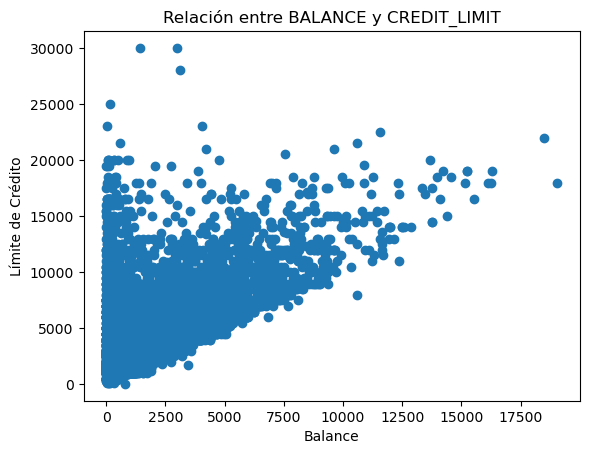

In [22]:
plt.scatter(data['BALANCE'], data['CREDIT_LIMIT'])
plt.title('Relación entre BALANCE y CREDIT_LIMIT')
plt.xlabel('Balance')
plt.ylabel('Límite de Crédito')
plt.show()

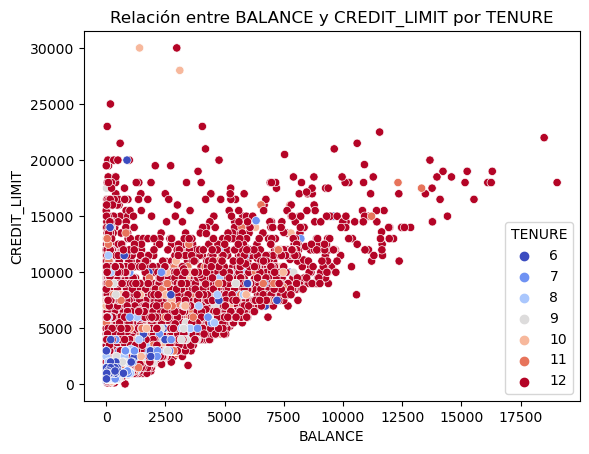

In [24]:
sns.scatterplot(x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['TENURE'], palette='coolwarm')
plt.title('Relación entre BALANCE y CREDIT_LIMIT por TENURE')
plt.show()

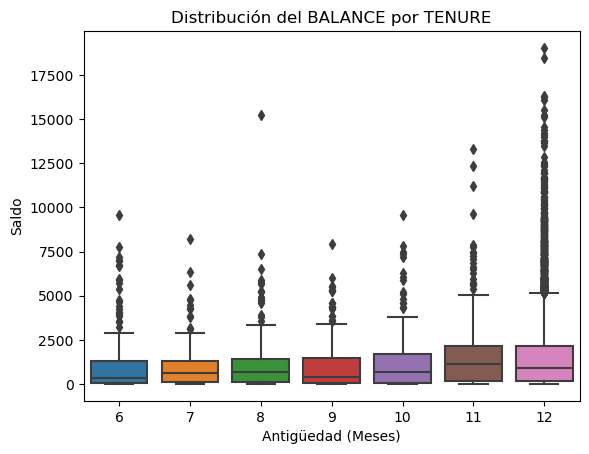

In [26]:
sns.boxplot(x=data['TENURE'], y=data['BALANCE'])
plt.title('Distribución del BALANCE por TENURE')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Saldo')
plt.show()

C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


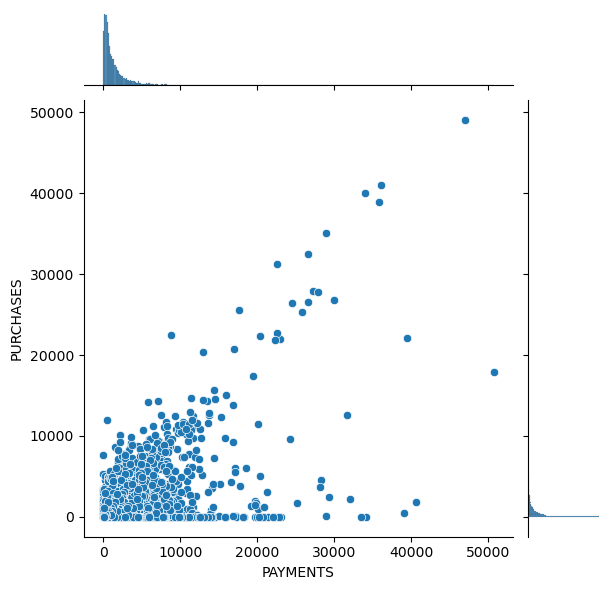

In [28]:
sns.jointplot(x=data['PAYMENTS'], y=data['PURCHASES'])
plt.show()

In [30]:
# AED para buscar correlación pero se debe utilizar variables numericas, el Cust_ID no lo es
#data.corr()

In [32]:
# Filtrar las variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [34]:
# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

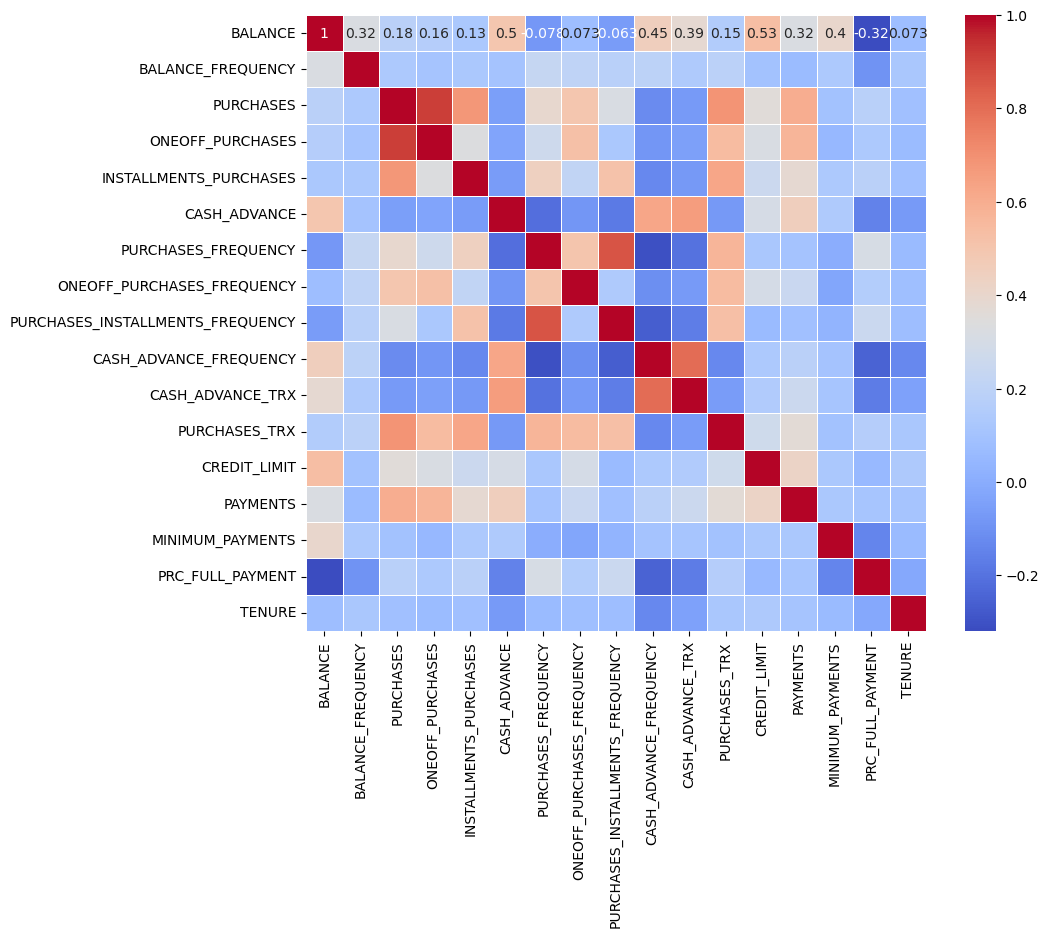

In [42]:
# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Data Processing


## Data Cleaning


In [46]:
missing_columns = data.columns[data.isnull().any()]

C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


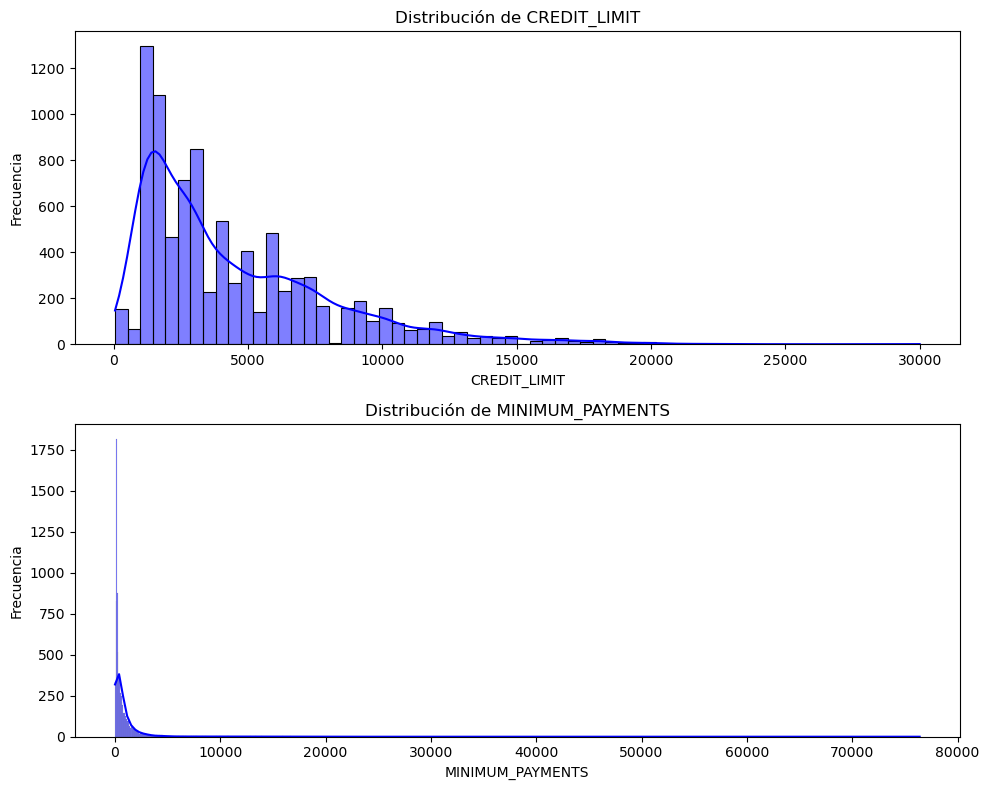

In [48]:
# Crear subplots para cada columna con valores faltantes
plt.figure(figsize=(10, 8))
for i, column in enumerate(missing_columns, 1):
    plt.subplot(len(missing_columns), 1, i)
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [50]:
#eliminar el Cust_ID
data = data.drop(columns=['CUST_ID'])

In [52]:
# Imputar con la mediana para todas las columnas numéricas
data_imputed = data.fillna(data.median())

In [54]:
data_imputed.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [56]:
# Eliminar la columna CUST_ID
data_cleaned = data_imputed

In [58]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Feature Engineering
Cree al menos 2 variables nuevas


In [61]:
# Relación entre las compras y el límite en el crédito
data_cleaned['PURCHASES_TO_CREDIT_LIMIT'] = data_cleaned['PURCHASES'] / data_cleaned['CREDIT_LIMIT']

In [63]:
# Realación entre los pagos y el saldo
data_cleaned['PAYMENTS_TO_BALANCE'] = data_cleaned['PAYMENTS'] / data_cleaned['BALANCE']

In [65]:
data_cleaned[['PURCHASES_TO_CREDIT_LIMIT', 'PAYMENTS_TO_BALANCE']].head()

,PURCHASES_TO_CREDIT_LIMIT,PAYMENTS_TO_BALANCE
0,0.095400,4.933946
1,0.000000,1.281210
2,0.103089,0.249310
3,0.199867,0.000000
4,0.013333,0.829550


C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

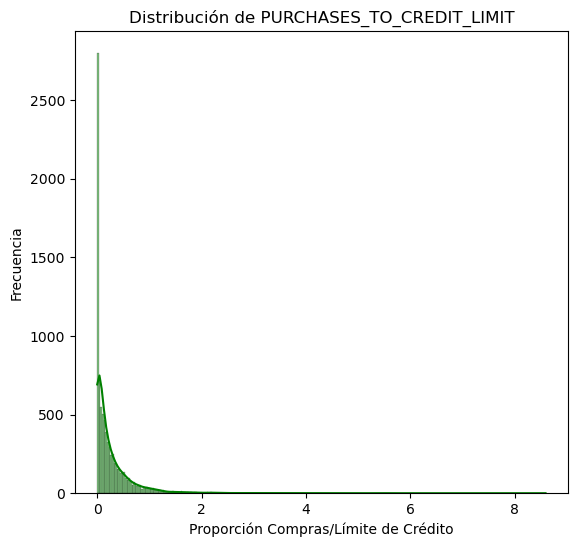

In [67]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['PURCHASES_TO_CREDIT_LIMIT'], kde=True, color='green')
plt.title('Distribución de PURCHASES_TO_CREDIT_LIMIT')
plt.xlabel('Proporción Compras/Límite de Crédito')
plt.ylabel('Frecuencia')

In [ ]:
"""plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['PAYMENTS_TO_BALANCE'], kde=True, color='orange')
plt.title('Distribución de PAYMENTS_TO_BALANCE')
plt.xlabel('Proporción Pagos/Balance')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()"""

In [69]:
# La computadora no pudo realizar la gráfica anterior así que se hizo una transformación logarítmica
data_cleaned['log_PAYMENTS_TO_BALANCE'] = np.log1p(data_cleaned['PAYMENTS_TO_BALANCE'])

In [71]:
data_cleaned[['PURCHASES_TO_CREDIT_LIMIT', 'PAYMENTS_TO_BALANCE', 'log_PAYMENTS_TO_BALANCE']].head()

,PURCHASES_TO_CREDIT_LIMIT,PAYMENTS_TO_BALANCE,log_PAYMENTS_TO_BALANCE
0,0.095400,4.933946,1.780689
1,0.000000,1.281210,0.824706
2,0.103089,0.249310,0.222592
3,0.199867,0.000000,0.000000
4,0.013333,0.829550,0.604070


C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


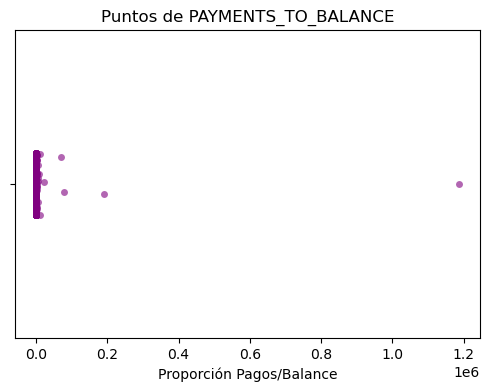

In [73]:
plt.figure(figsize=(6, 4))
sns.stripplot(data=data_cleaned, x='PAYMENTS_TO_BALANCE', color='purple', alpha=0.6)
plt.title('Puntos de PAYMENTS_TO_BALANCE')
plt.xlabel('Proporción Pagos/Balance')
plt.show()

C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


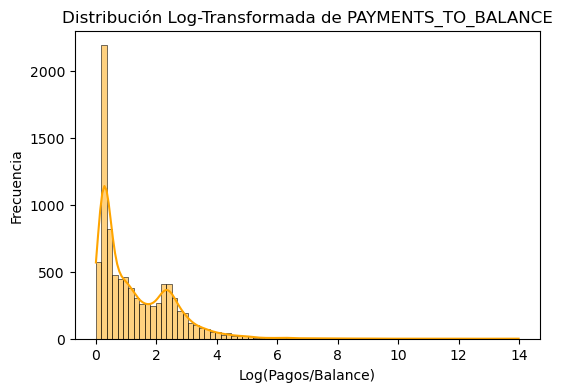

In [75]:
# Graficar la distribución log-transformada
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['log_PAYMENTS_TO_BALANCE'], kde=True, color='orange')
plt.title('Distribución Log-Transformada de PAYMENTS_TO_BALANCE')
plt.xlabel('Log(Pagos/Balance)')
plt.ylabel('Frecuencia')
plt.show()

Se crea categoria del Credit Limit para hacer una análisis categorico y no manejar la variable continua.

In [78]:
data_cleaned[['CREDIT_LIMIT']].describe()

,CREDIT_LIMIT
count,8950.000000
mean,4494.282473
std,3638.646702
min,50.000000
25%,1600.000000
50%,3000.000000
75%,6500.000000
max,30000.000000


In [80]:
data_cleaned['CREDIT_LIMIT_CATEGORY'] = pd.cut(
    data_cleaned['CREDIT_LIMIT'],
    bins=[0, 1500, 3000, 6000, 9000, data_cleaned['CREDIT_LIMIT'].max()],
    labels=[1, 2, 3, 4,5],
    right=True
)

C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


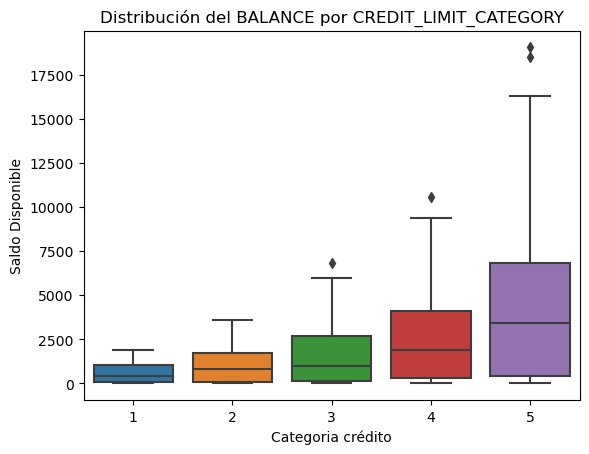

In [86]:
sns.boxplot(x=data_cleaned['CREDIT_LIMIT_CATEGORY'], y=data_cleaned['BALANCE'])
plt.title('Distribución del BALANCE por CREDIT_LIMIT_CATEGORY')
plt.xlabel('Categoria crédito')
plt.ylabel('Saldo Disponible')
plt.show()

In [88]:
data_cleaned.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASES_TO_CREDIT_LIMIT', 'PAYMENTS_TO_BALANCE',
       'log_PAYMENTS_TO_BALANCE', 'CREDIT_LIMIT_CATEGORY'],
      dtype='object')

C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrumb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

<Figure size 1600x1000 with 0 Axes>

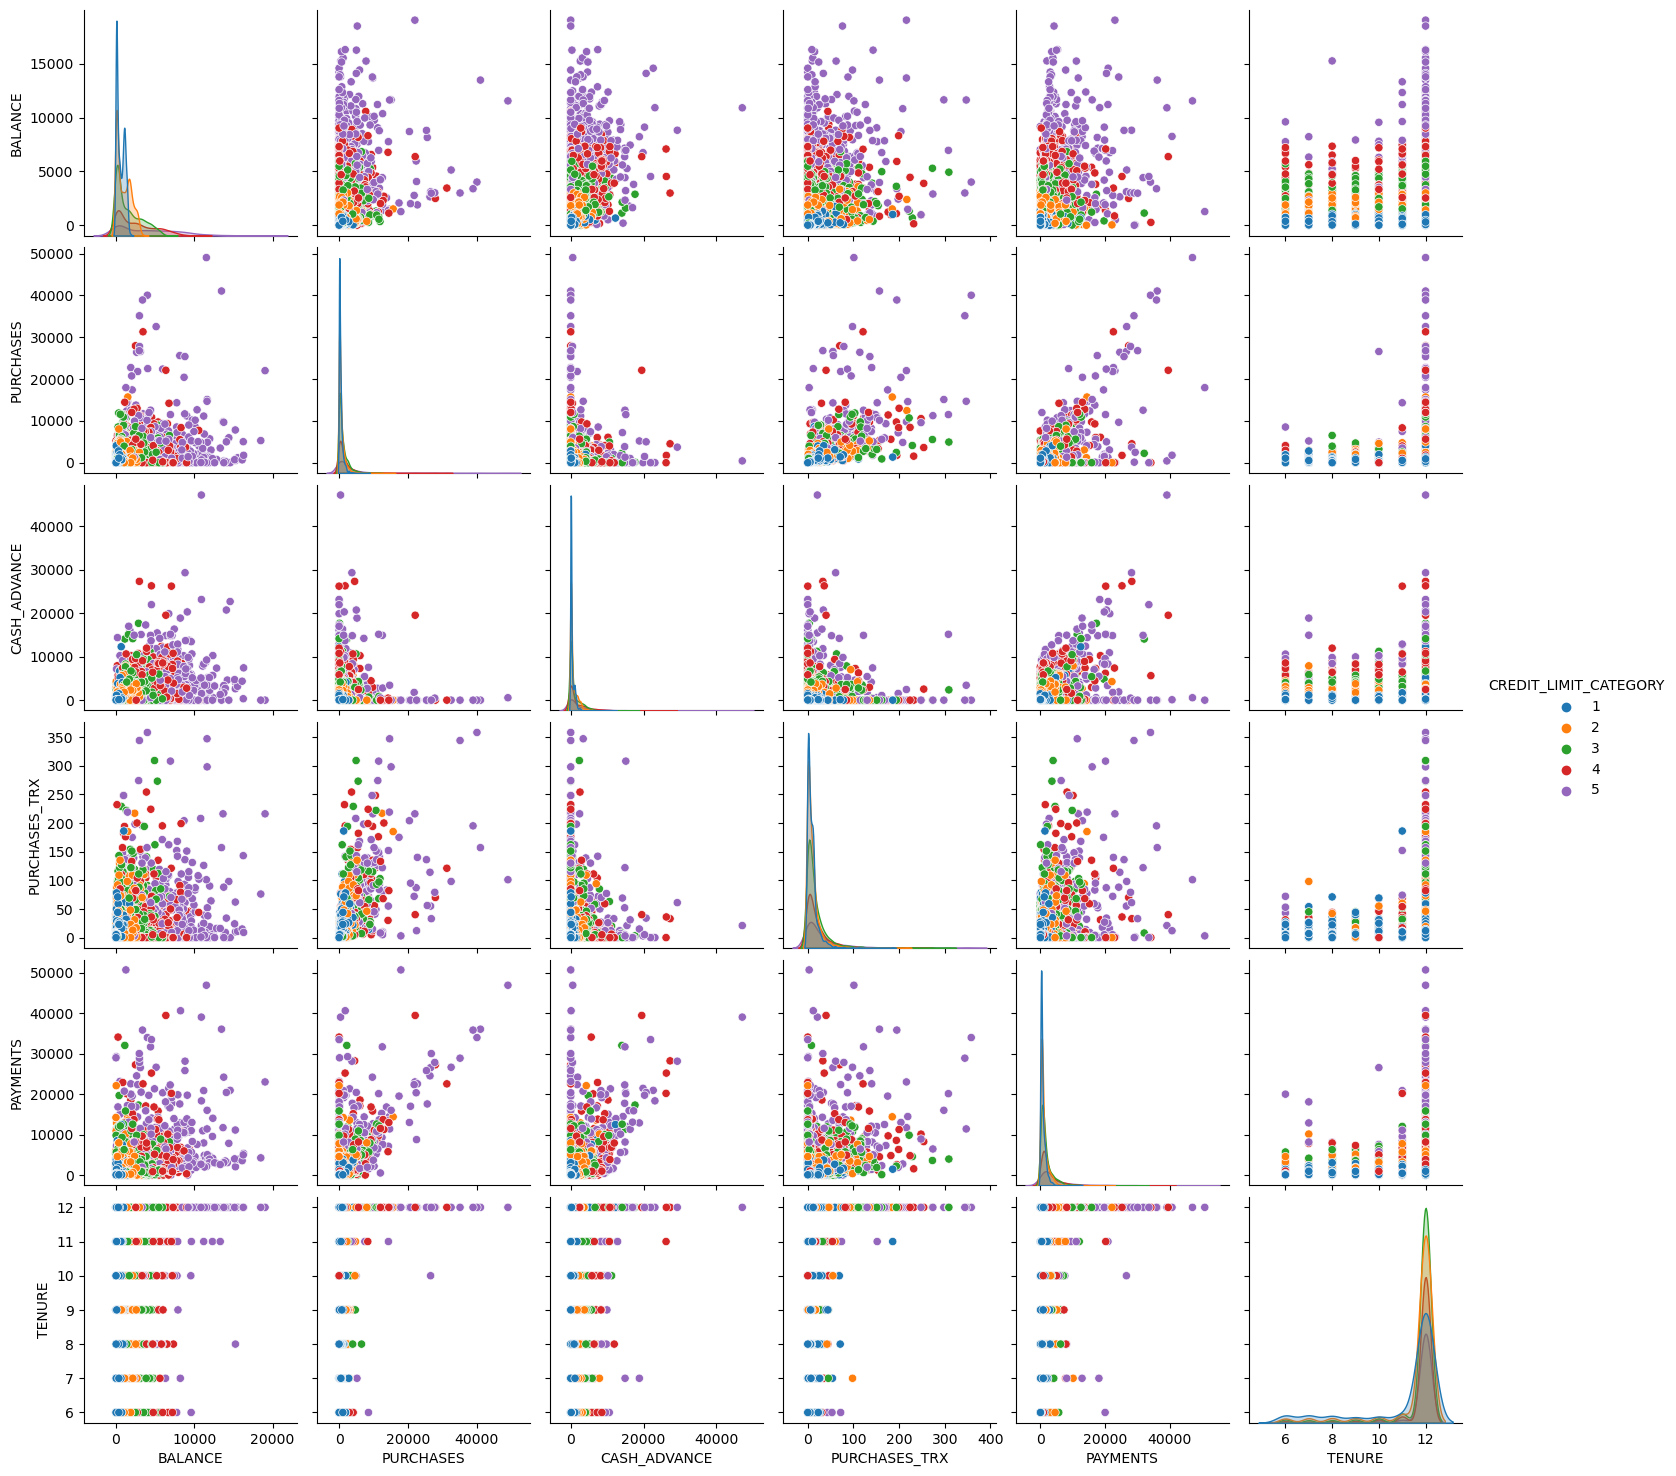

In [90]:
cluster_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE','PURCHASES_TRX','PAYMENTS','TENURE']


plt.figure(1, figsize=(16,10))
sns.pairplot(data=data_cleaned[cluster_cols+['CREDIT_LIMIT_CATEGORY']], hue='CREDIT_LIMIT_CATEGORY')
plt.show()

## Encoding


No es necesario realizar encoding. Las variables son numéricas. Hay categoricas binarias, variables continuas y categoricas ordinales. Por lo tanto los algoritmos de ml podrán interpretar correctamente.

## Scaling (if needed)


In [94]:
all_vars = data_cleaned.columns
print(all_vars)
numeric_vars = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASES_TO_CREDIT_LIMIT', 'CREDIT_LIMIT_CATEGORY']

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASES_TO_CREDIT_LIMIT', 'PAYMENTS_TO_BALANCE',
       'log_PAYMENTS_TO_BALANCE', 'CREDIT_LIMIT_CATEGORY'],
      dtype='object')


In [96]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear un transformer para las columnas numéricas (escalado)
numeric_transformer = MinMaxScaler()

# Crear un ColumnTransformer que aplique el escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_vars),
    ])

In [98]:
# Ajustar y transformar los datos con el preprocesador
data_preprocessed = preprocessor.fit_transform(data_cleaned)

# Mostrar los datos preprocesados
print(data_preprocessed)

[[2.14779454e-03 8.18182000e-01 1.94536779e-03 ... 1.00000000e+00
  1.11042437e-02 0.00000000e+00]
 [1.68169097e-01 9.09091000e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 7.50000000e-01]
 [1.31026136e-01 1.00000000e+00 1.57662475e-02 ... 1.00000000e+00
  1.19992566e-02 7.50000000e-01]
 ...
 [1.22871936e-03 8.33333000e-01 2.94456089e-03 ... 0.00000000e+00
  1.68076813e-02 0.00000000e+00]
 [7.06688341e-04 8.33333000e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.95717777e-02 6.66667000e-01 2.22932216e-02 ... 0.00000000e+00
  1.06042229e-01 0.00000000e+00]]


In [100]:
# Crear el nuevo DataFrame con los datos preprocesados
df_preprocessed = pd.DataFrame(data_preprocessed, columns=numeric_vars)

# Mostrar el nuevo DataFrame
print("DataFrame preprocesado:")
print(df_preprocessed)

DataFrame preprocesado:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.087521           0.636364   0.030567          0.036775   
4     0.042940           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8945  0.001496           1.000000   0.005936          0.000000   
8946  0.001007           1.000000   0.006118          0.000000   
8947  0.001229           0.833333   0.002945          0.000000   
8948  0.000707           0.833333   0.000000          0.000000   
8949  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685       

## # Train model/Tune hyperparameters 

Explique el criterio utilizado

In [103]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

C:\Users\mrumb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrumb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrumb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrumb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrumb\anaconda3\Lib\site-packages\sklearn\clust

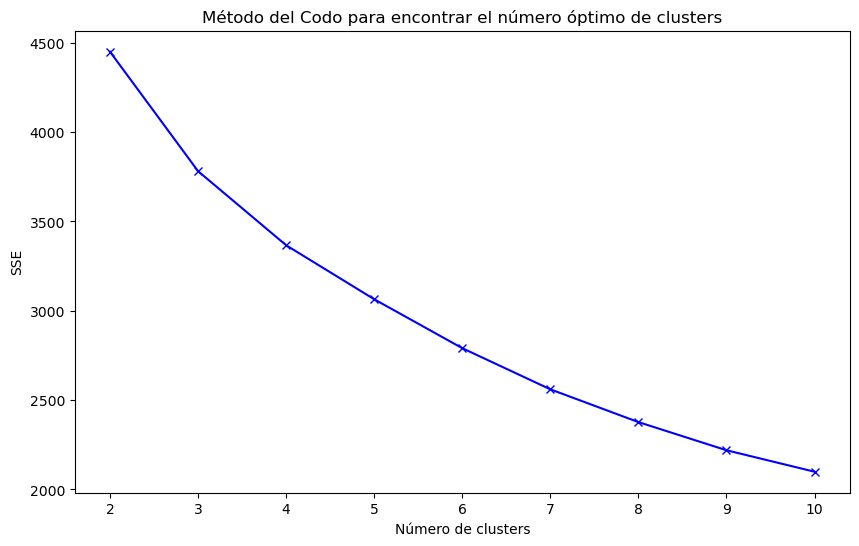

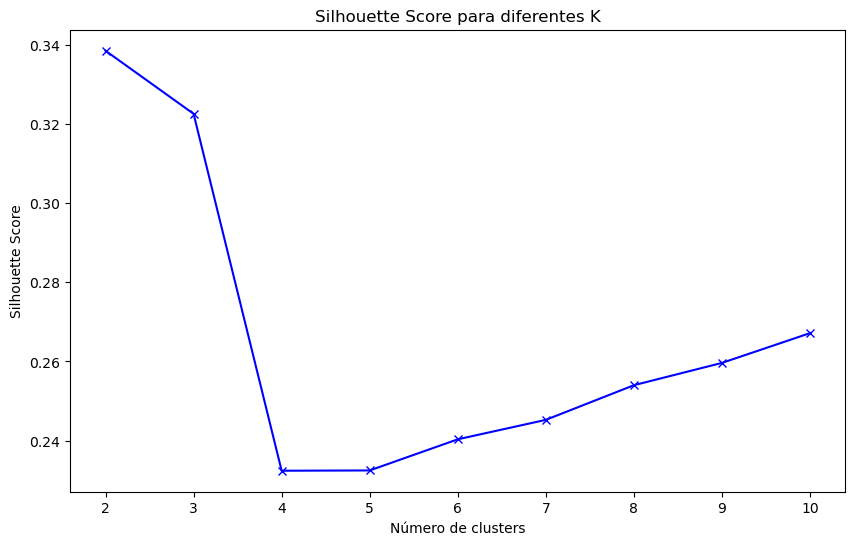

In [105]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

In [107]:
# Aplicar KMeans y K-Medoids (K-Medians)
optimal_k = 3  # Elegido basado en los gráficos

# Aplicar KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_preprocessed)

# Aplicar K-Medoids (aproximación a K-Medians)
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_preprocessed)

C:\Users\mrumb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
kmeans_silhouette = silhouette_score(df_preprocessed, kmeans_labels)
kmedoids_silhouette = silhouette_score(df_preprocessed, kmedoids_labels)

# Obtener la inercia para KMeans
kmeans_inertia = kmeans.inertia_

# Para KMedoids, calculamos la suma de distancias (similar a la inercia en KMeans)
kmedoids_inertia = kmedoids.inertia_

# Mostrar los resultados
print(f"KMeans - Silhouette Score: {kmeans_silhouette}")
print(f"KMeans - Inercia (SSE): {kmeans_inertia}")
print(f"KMedoids - Silhouette Score: {kmedoids_silhouette}")
print(f"KMedoids - Inercia (Suma de distancias): {kmedoids_inertia}")

KMeans - Silhouette Score: 0.3225689382366752
KMeans - Inercia (SSE): 3781.495350172689
KMedoids - Silhouette Score: 0.22846191122625753
KMedoids - Inercia (Suma de distancias): 5671.4072418075275


El modelo de clusterización con mejores indicadores para estas observaciones es el KMeans. Y se utilizan 3 clusters.

In [112]:
# Categorical variable distribution among clusters
df_preprocessed['KMeans_Cluster'] = kmeans_labels

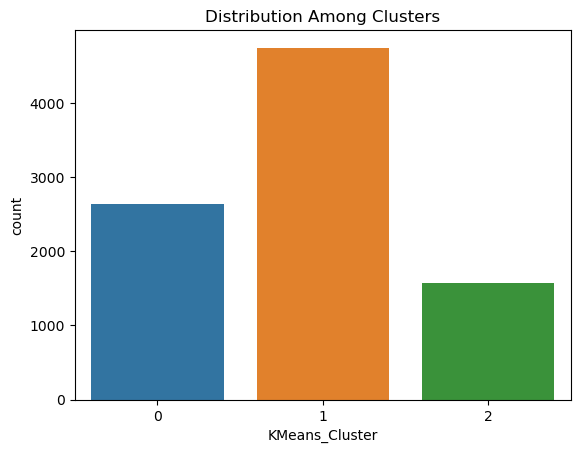

In [114]:
sns.countplot(data=df_preprocessed, x='KMeans_Cluster')
plt.title('Distribution Among Clusters')
plt.show()

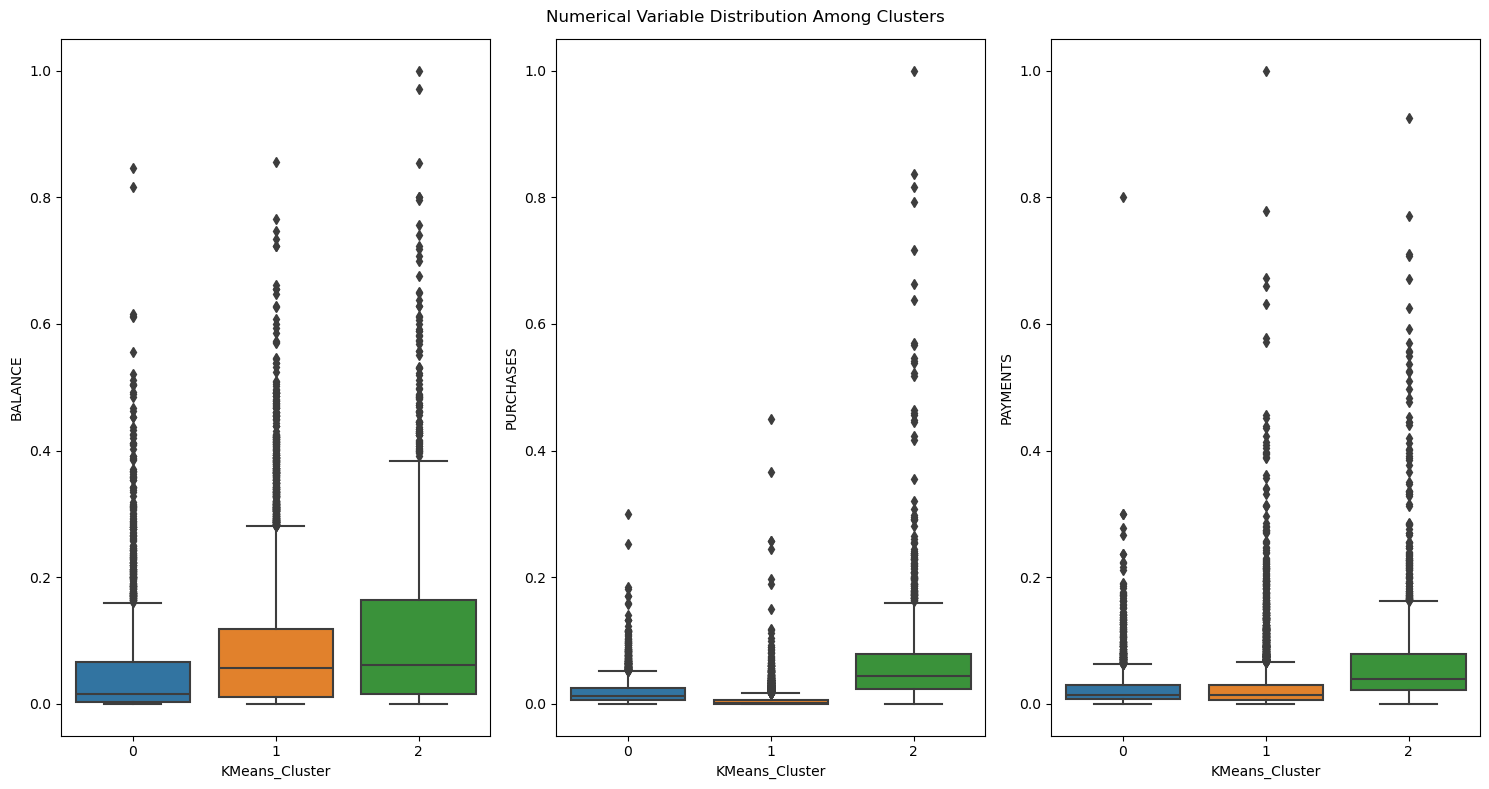

In [116]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
cols = ['BALANCE', 'PURCHASES', 'PAYMENTS']

# Crear cada gráfico
for i in range(len(cols)):
    sns.boxplot(data=df_preprocessed, x='KMeans_Cluster', y=cols[i], ax=axs[i])

# Título y ajustes
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

El Kmeans no es claro para clusterizar los clientes con rango medio de saldo disponible. Se prueba otro modelo. 

In [123]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.3, 0.5, 0.7, 0.9, 1.1],  # Distancia de radio
    'min_samples': [2, 3, 4, 6]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(df_preprocessed)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_preprocessed, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {'eps': 0.9, 'min_samples': 2}
Mejor Silhouette Score: 0.4949


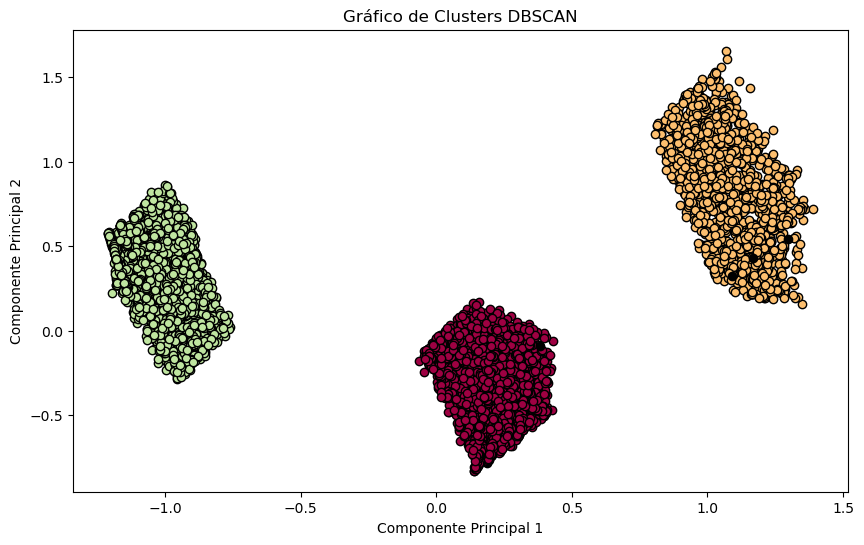

In [126]:
# Visualización de los clusters

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reducir las dimensiones de los datos a 2 componentes principales para visualización
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_preprocessed)

# Ajustar DBSCAN con los mejores parámetros encontrados
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels = dbscan.fit_predict(df_preprocessed)

# Crear el gráfico
plt.figure(figsize=(10, 6))
unique_labels = set(labels)

# Asignar colores a cada cluster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para el ruido (label -1)
        col = [0, 0, 0, 1]
    
    # Filtrar datos del cluster actual
    class_member_mask = (labels == k)
    xy = df_reduced[class_member_mask]
    
    # Graficar los puntos del cluster
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

# Títulos y leyendas
plt.title('Gráfico de Clusters DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Se hizo esta visualización y se observan 3 clusters claros. Es concluyente.

In [ ]:
# best_model = KMeans(random_state=42,n_clusters=K)
# best_model = KMedoids(random_state=42,n_clusters=K)

# best_model = DBSCAN(**best_params)
# best_model = AgglomerativeClustering(**best_params)

In [ ]:
#best_model.fit(df_preprocessed)

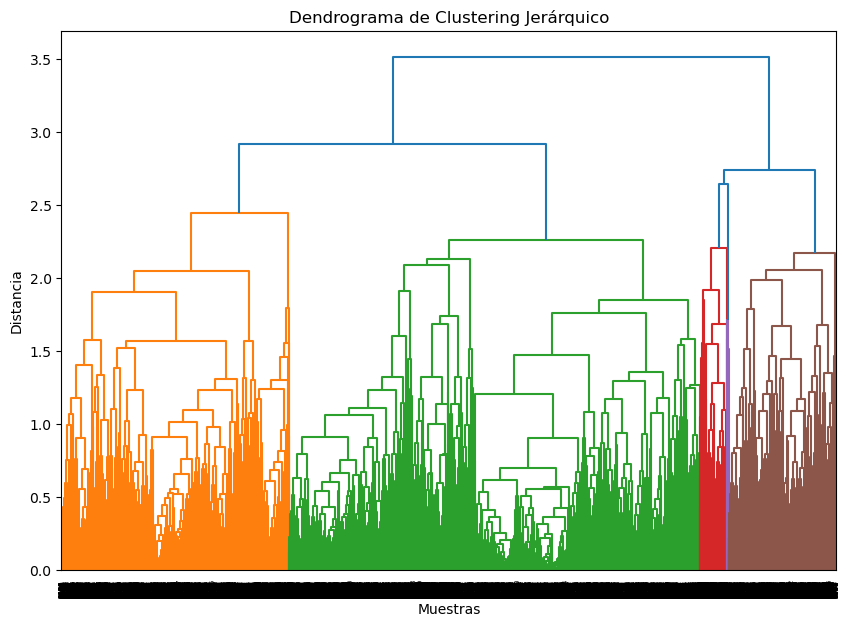

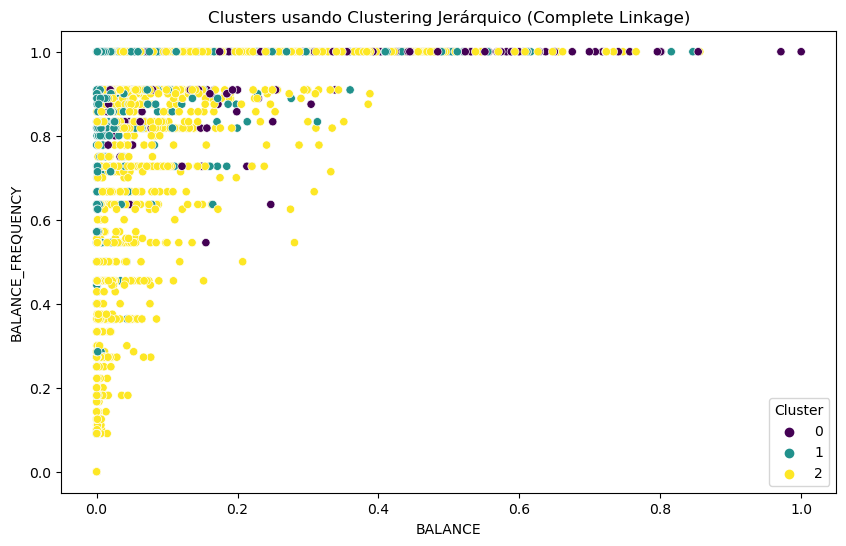

In [128]:
# Crear el clustering jerárquico, método 'complete'
data_cluster = df_preprocessed
linked = linkage(data_cluster, method='complete')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',  # orientación del dendrograma
           distance_sort='descending',  # ordenar por distancia
           show_leaf_counts=True)  # mostrar número de puntos en cada cluster
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

# Clustering jerárquico con AgglomerativeClustering de sklearn
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_labels = hierarchical_clustering.fit_predict(data_cluster)

# Añadir los labels al DataFrame
data_cluster['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cluster, x=data_cluster.columns[0], y=data_cluster.columns[1], hue='Cluster', palette='viridis')
plt.title('Clusters usando Clustering Jerárquico (Complete Linkage)')
plt.xlabel(data_cluster.columns[0])
plt.ylabel(data_cluster.columns[1])
plt.show()

Se concluye que el mejor metodo para clusterizar es el DBSCAN.

# Visualization of clusters

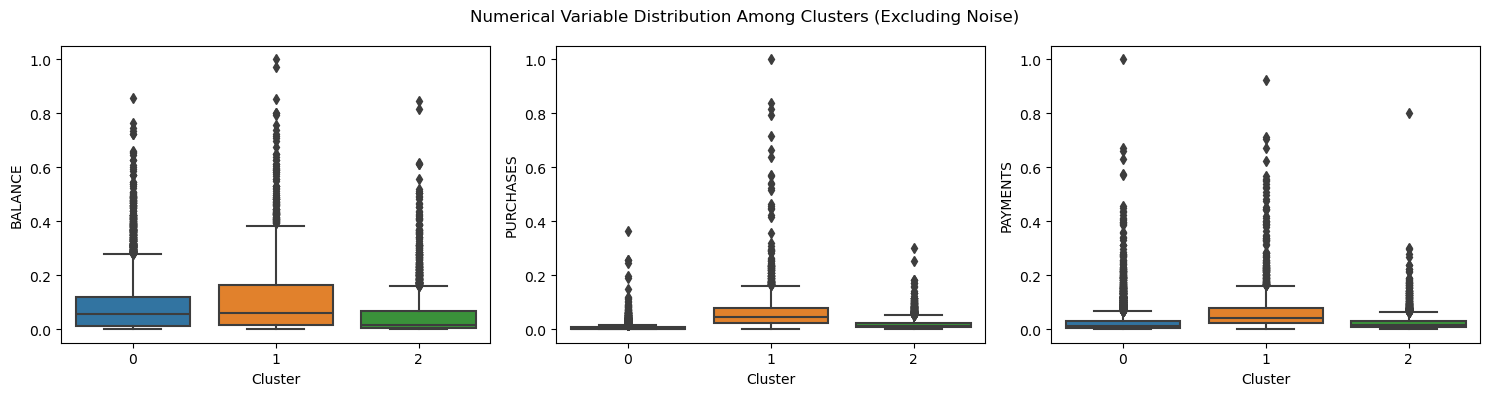

In [132]:
data_cluster_dbscan = pd.DataFrame(df_preprocessed, columns=['BALANCE', 'PURCHASES', 'PAYMENTS'])
data_cluster_dbscan['Cluster'] = labels

# Filtrar para excluir el ruido (Cluster -1)
data_cluster_no_noise = data_cluster_dbscan[data_cluster_dbscan['Cluster'] != -1]

# Crear la figura para graficar 'BALANCE' y 'PURCHASES' entre clusters sin el ruido
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['BALANCE', 'PURCHASES', 'PAYMENTS']

# Generar los gráficos para cada variable
for i, col in enumerate(cols):
    sns.boxplot(data=data_cluster_no_noise, x='Cluster', y=col, ax=axs[i])

# Título y ajustes finales
fig.suptitle('Numerical Variable Distribution Among Clusters (Excluding Noise)')
plt.tight_layout()
plt.show()

# Interpretation of clusters

Cluster 0. Clientes con saldo disponible alto y score de compras alto
Cluster 1. Clientes con saldo disponible bajo y score de compras medio
Cluster 2. Clientes con saldo disponible medio y score de compras bajo